# Teoría Espectral Básica
## Vectores y valores propios
**Dr. Juliho Castillo Colmenares**

Diremos que $\lambda \in R$ es un **valor propio (izquierdo)** de una matriz $M \in R^{N\times N}$ si existe al menos un *vector renglón* $v\in R^{N\times 1}, v\neq 0$, tal que $$vA = \lambda v.$$ A los vectores que cumplen la ecuación se les llama **vectores propios (izquierdo)**.

De manera similar, si un *vector columna* $v\in R^{1 \times N}, v\neq 0$ cumple la ecuación $Av = \lambda v$, diremos que es un **vector propio (derecho)**.

En tal caso, la ecuación $v(A-\lambda I)$ debería tener una solución no nula $v$. Lo cual implica que $|A-\lambda I|=0.$ 

Como $A, I$ son matrices dadas, la expresión $|A-x I|$ solo depende de $x$ y de hecho genera un polinomio $p_A(x)=|x I-A|$, llamado *polinomio característico*, cuyas raíces $\lambda$ se conocen como **valores propios**.

Cada valor propio $\lambda$ tiene asociado uno o más vectores $v_{\lambda, 1},..., v_{\lambda, k}$, tales que $$v_{\lambda, i}A=\lambda v_{\lambda,i}, i = 1,...,k$$ a los que llamaremos $\lambda-$vectores propios, los cuales generan un subespacio vectorial de $R^{N}$ llamado $\lambda-$espacio propio. 

Definamos la multiplicidad de $\lambda$ como $$m_{\lambda}=\max\{ m | (x-\lambda)^m\text{ divide a }p_A(x) \}.$$ 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint # pretty print

In [58]:
"""
Capturamos una matriz cuadrada a manera de ejemplo
"""
A = np.array( [[1,-1,4], [3,2,-1], [2,1,1]] )
pprint(A)

array([[ 1, -1,  4],
       [ 3,  2, -1],
       [ 2,  1,  1]])


In [59]:
"""
Calculamos la dimensión de la matriz
"""
dim = A.shape 
dim 

(3, 3)

In [60]:
""" 
Creamos una matriz identidad de con las dimensiones de A
"""
I = np.identity(dim[0])
pprint(I)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])


In [61]:
""" 
Definimos el polinomio característico. Lo vectorizaremos para poder aplicarlo punto a punto.
"""
def p(x):
    return np.linalg.det(x*I-A)

p = np.vectorize(p)

p(0)

array(-4.)

In [62]:
"""
Analizamos la gráfica del polinomio característica
"""
x = np.linspace(0,5)
y = p(x)


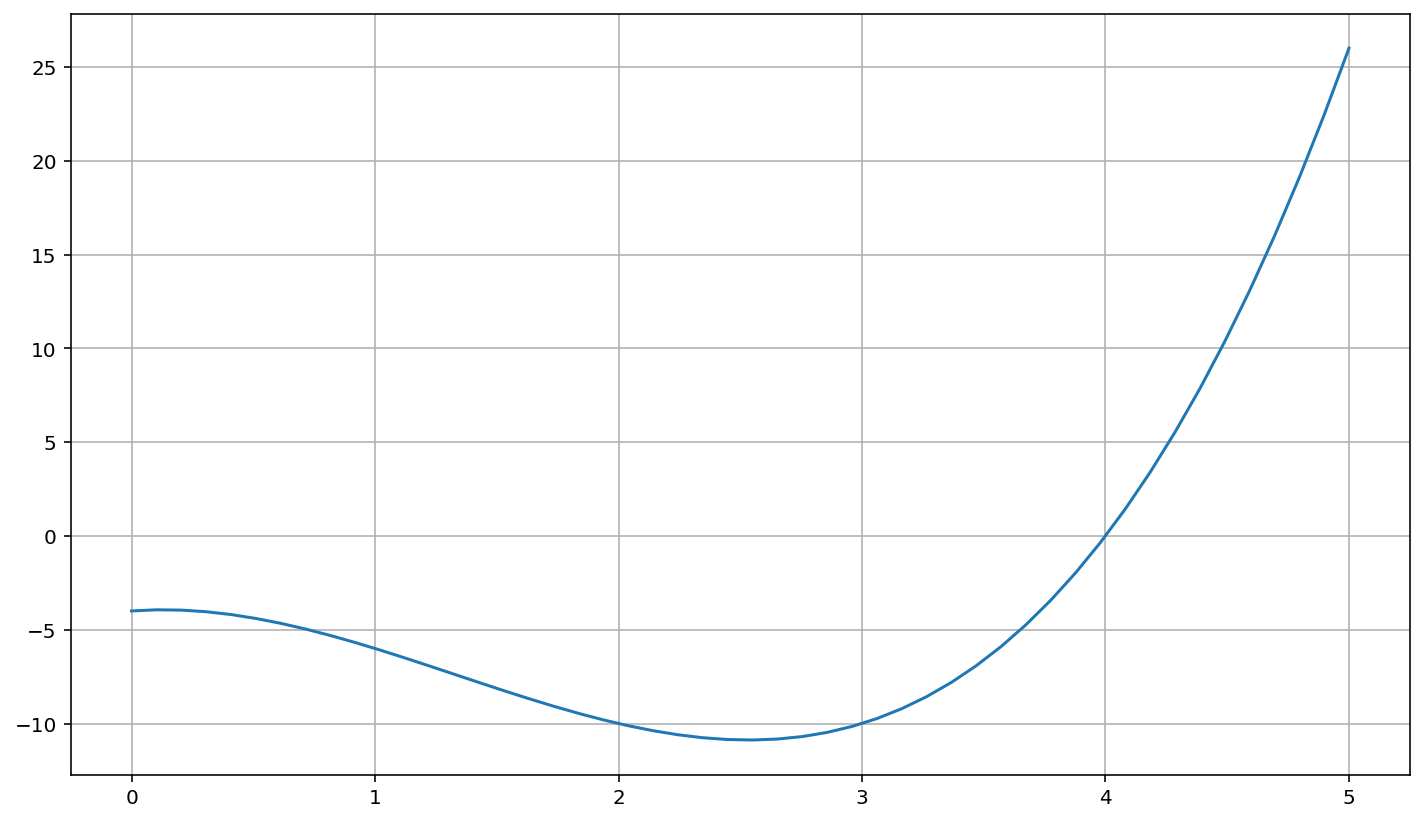

In [63]:
plt.plot(x, y)
plt.grid()
plt.show()

In [64]:
"""
De la gráfica, es aparente que una raíz del polinomio característico está cerca de x=4.
Utilizaremos scipy para calcular numéricamente esta raíz.
"""

from scipy import optimize

raiz = optimize.root(p, 4)
print(raiz.x)

[4.]


In [65]:
"""
Creamos una matriz asociada el eigensistema
"""
M = (4*I-A).astype('float32')
print(type(M))
pprint(M)

<class 'numpy.ndarray'>
array([[ 3.,  1., -4.],
       [-3.,  2.,  1.],
       [-2., -1.,  3.]], dtype=float32)


In [66]:
"""
Teóricamente, la matriz 4I-A debería ser singular, es decir, no tendría inversa. 
O de manera equivalente, su determinante debería ser exactamente cero. 

Sin embargo, por errores numéricos, el cálculo del determinante es a veces 
ligeramente diferente de cero. 
"""
np.linalg.det(M)

0.0

In [67]:
"""
Debido a esto, en ocasiones NUMPY nos devuelve una matriz "inversa" con coeficiente enormes.
"""
try:
    B = np.linalg.inv(M)
    print(B)
except:
    print("El determinante es diferente de cero")

El determinante es diferente de cero


In [68]:
"""
Sin embargo, esta matriz no es realmente la inversa, 
lo cual se verifica al hacerla multiplicación con la 
matriz A. 

El resultado es una matriz diferente de la identidad. 
"""
try: 
    np.matmul(M,B)
except:
    print("La inversa no está definida")

La inversa no está definida


Como hemos visto, si bien NUMPY es un módulo que nos ayuda a realizar cálculos numéricos de manera eficiente, tiene graves fallas al tratar con resultados teóricos que dependen de la exactitud de los cálculos. Por esta razón, utilizaremos otra opción, a saber SYMPY, un módulo dedicado (como su nombre sugiere) al cómputo simbólico. 

## Eigenanálisis con Scipy

[Eigenanálisis con Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig)

In [69]:
"""
Transformamos la matriz A de un objeto numpy.array a sympy.Matrix
"""
from sympy import Matrix
A = Matrix(A)

In [70]:
"""
Calculamos los eigenvalores. Como podemos observar, x=4 aparece 
en la lista de los mismos. 

La pareja x:m denota el eigenvalor con su multiplicidad. 
"""
pprint(A.eigenvals()) # eigen = propio

{-I: 1, I: 1, 4: 1}


In [71]:
"""
De hecho, podemos calcular los eigenvalores, sean izquierdos o derechos. 
"""
pprint(A.left_eigenvects())

[(4, 1, [Matrix([[7/9, 1/9, 1]])]),
 (-I,
  1,
  [Matrix([[-(-13 + I)*(1 - I)*(-2 - 3*(1 + I)**2 - 2*I)/340, -(-13 + I)*(-8 + (1 + I)**2)/170, 1]])]),
 (I,
  1,
  [Matrix([[-(-13 - I)*(1 + I)*(-2 + 2*I - 3*(1 - I)**2)/340, -(-13 - I)*(-8 + (1 - I)**2)/170, 1]])])]


In [72]:
"""
El siguiente script permite visualizar la información de manera más adecuada. 

A la par, iremos capturando los eigenvectores en una matriz.
"""

from sympy import expand

eigenmatrix = []

for row in A.left_eigenvects():
    l, m, v = row
    print("Eigenvalor: ", l)
    for i in range(m):
        eigenvector = expand(v[i])
        print(f"Eigenvector #{i+1}: {eigenvector}")
        eigenmatrix.append(eigenvector)
        print('\n')

Eigenvalor:  4
Eigenvector #1: Matrix([[7/9, 1/9, 1]])


Eigenvalor:  -I
Eigenvector #1: Matrix([[-2/5 - I/5, -3/5 + I/5, 1]])


Eigenvalor:  I
Eigenvector #1: Matrix([[-2/5 + I/5, -3/5 - I/5, 1]])




In [73]:
"""
Transformamos la eigenmatrix en un objeto sympy.Matrix
"""
L = Matrix(eigenmatrix)
pprint(L)

Matrix([
[       7/9,        1/9, 1],
[-2/5 - I/5, -3/5 + I/5, 1],
[-2/5 + I/5, -3/5 - I/5, 1]])


In [74]:
"""
La Matrix L es en realidad un cambio de base. Al conjugar A, obtenemos una matriz diagonal con los eigenvalores.
"""
D = L*A*L.inv()
pprint(expand(D))

Matrix([
[4,  0, 0],
[0, -I, 0],
[0,  0, I]])


### Eigenvectores derechos
Existe la noción similar de vlores propios derechos y, de hecho, es más común encontrar esta definición en la literatura. En este caso, un $\lambda$-eigenvector $v$ para la matriz $A$ es aquel que cumple la ecuación $Av=\lambda v$. 

In [75]:
for row in A.eigenvects():
    l, m, v = row
    print(f"Eigenvalor: {l}")
    for i in range(m):        
        eigv = expand(v[i])
        print(f"Eigenvector #{i+1}: {eigv}")
        print('\n')

Eigenvalor: 4
Eigenvector #1: Matrix([[1], [1], [1]])


Eigenvalor: -I
Eigenvector #1: Matrix([[-8/5 + I/5], [11/5 - 7*I/5], [1]])


Eigenvalor: I
Eigenvector #1: Matrix([[-8/5 - I/5], [11/5 + 7*I/5], [1]])


